## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_data= pd.merge(mouse_metadata,study_results, on="Mouse ID")

## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_data = mouse_data[["Drug Regimen", "Tumor Volume (mm3)"]]
drug_regimen= mouse_data["Drug Regimen"].unique()

mean_tumorvolume = []
median_tumorvolume=[]
mode_tumorvolume=[]
var_tumorvolume=[]
std_tumorvolume=[]
data_points=[]


for regimen in drug_regimen:
    data = drug_data.loc[(drug_data["Drug Regimen"]==regimen)]
    data_points.append(len(data))
    mean_tumorvolume.append(data["Tumor Volume (mm3)"].mean())    
    median_tumorvolume.append(data["Tumor Volume (mm3)"].median())
    mode_tumorvolume.append((data["Tumor Volume (mm3)"]).mode())
    var_tumorvolume.append(np.var((data["Tumor Volume (mm3)"])))
    std_tumorvolume.append(np.std((data["Tumor Volume (mm3)"])))

summary_plot = pd.DataFrame({"Drug Regimen":drug_regimen,
                             "Mean Tumor Volume": mean_tumorvolume,
                             "Median Tumor Volume": median_tumorvolume,
                             "Mode Tumor Volume": mode_tumorvolume,
                             "Variance Tumor Volume": var_tumorvolume,
                             "Standard Deviation Tumor Volume": std_tumorvolume})
summary_plot


,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Mode Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume
0,Ramicane,40.216745,40.673236,0 45.0 dtype: float64,23.383692,4.835669
1,Capomulin,40.675741,41.557809,0 45.0 dtype: float64,24.839296,4.983904
2,Infubinol,52.884795,51.820584,0 45.0 dtype: float64,42.886388,6.548770
3,Placebo,54.033581,52.288934,0 45.0 dtype: float64,60.830138,7.799368
4,Ceftamin,52.591172,51.776157,0 45.0 dtype: float64,39.069446,6.250556
5,Stelasyn,54.233149,52.431737,0 45.0 dtype: float64,59.122106,7.689090
6,Zoniferol,53.236507,51.818479,0 45.0 dtype: float64,48.266689,6.947423
7,Ketapril,55.235638,53.698743,0 45.0 dtype: float64,68.188930,8.257659
8,Propriva,52.322552,50.854632,0 45.0 dtype: float64,42.088020,6.487528
9,Naftisol,54.331565,52.509285,0 45.0 dtype: float64,65.817708,8.112811


## Bar plots

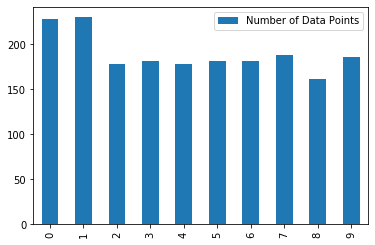

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
bar_pd =pd.DataFrame({"Drug Regimen": drug_regimen, "Number of Data Points": data_points})
bar_pd.plot(kind= "bar")


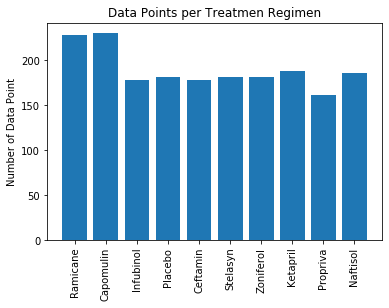

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(drug_regimen, data_points,align="center")
ticks= [value for value in drug_regimen]
plt.xticks(ticks, ticks, rotation= "vertical")
plt.ylabel("Number of Data Point")
plt.title("Data Points per Treatmen Regimen")
plt.show()

## Pie plots

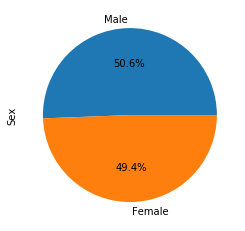

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#pie_pd= pd.DataFrame({"Sex": ("Male", "Female"), "Count": sizes})
#pie_pd.reset_index()
#pie_pd.plot(kind="pie", subplots= True)
sizes =mouse_data["Sex"].value_counts()
sizes.plot(kind= "pie",autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x2790ce07dd8>,
 [Text(-0.6908564105755949, -0.8559891471079557, 'Male'),
  Text(0.690856410575595, 0.8559891471079556, 'Female')],
 [Text(-0.37683076940486987, -0.46690317114979396, '50.6%'),
  Text(0.3768307694048699, 0.46690317114979385, '49.4%')])

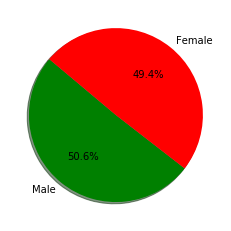

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

explode =(0, 0)
labels = ["Male", "Female"]
colors = ("green", "red")

plt.pie(sizes,explode=explode,labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=140)

## Quartiles, outliers and boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

new_mouse_data= mouse_data[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]

prominent_regimens = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
regi=[]
ids=[]
final_tumorvolume=[]

for regimen in prominent_regimens:
    data = new_mouse_data.loc[(new_mouse_data["Drug Regimen"]==regimen)]
    mouse_ids = data["Mouse ID"].unique()
    for mouse in mouse_ids:
        data2= data.loc[(data["Mouse ID"])==mouse]
        regi.append(data2["Drug Regimen"].iloc[-1])
        ids.append(data2["Mouse ID"].iloc[-1])
        final_tumorvolume.append(data2["Tumor Volume (mm3)"].iloc[-1])
        
final_volumes_pd= pd.DataFrame({"Mouse ID": ids, "Regimen": regi, "Final Tumor Volume": final_tumorvolume})
final_volumes_pd=final_volumes_pd.sort_values(["Regimen"]).reset_index(drop=True)

capomulin = final_volumes_pd.loc[(final_volumes_pd["Regimen"]== "Capomulin")]
ramicane = final_volumes_pd.loc[(final_volumes_pd["Regimen"]== "Ramicane")]
infubinol = final_volumes_pd.loc[(final_volumes_pd["Regimen"]== "Infubinol")]
ceftamin = final_volumes_pd.loc[(final_volumes_pd["Regimen"]== "Ceftamin")]



In [34]:
ceftamin.reset_index(drop=True)
del ceftamin["Regimen"]
capomulin.reset_index(drop=True)
del capomulin["Regimen"]
ramicane.reset_index(drop=True)
del ramicane["Regimen"]
infubinol.reset_index(drop=True)
del infubinol["Regimen"]

In [35]:
capomulin

,Mouse ID,Final Tumor Volume
0,s185,23.343598
1,i557,47.685963
2,r944,41.581521
3,l509,41.483008
4,s710,40.728578
5,g316,40.159220
6,v923,40.658124
7,w150,39.952347
8,j119,38.125164
9,j246,38.753265


In [38]:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


KeyError: 0.25

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen